# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [62]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | manokwari
Processing Record 3 of Set 1 | severobaykal'sk
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | lata
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | lompoc
Processing Record 8 of Set 1 | lorengau
Processing Record 9 of Set 1 | robore
Processing Record 10 of Set 1 | praya
Processing Record 11 of Set 1 | forster
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | xai-xai
Processing Record 14 of Set 1 | isafjordur
Processing Record 15 of Set 1 | bernkastel-kues
Processing Record 16 of Set 1 | vila velha
Processing Record 17 of Set 1 | palu
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | sampit
Processing Record 20 of Set 1 | klyuchi
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | puerto natales
Processing Record 23 of S

Processing Record 40 of Set 4 | fortuna
Processing Record 41 of Set 4 | mount pearl
Processing Record 42 of Set 4 | kot diji
Processing Record 43 of Set 4 | longyearbyen
Processing Record 44 of Set 4 | luanda
Processing Record 45 of Set 4 | manaure
Processing Record 46 of Set 4 | chibougamau
Processing Record 47 of Set 4 | isangel
Processing Record 48 of Set 4 | sidrolandia
Processing Record 49 of Set 4 | corinto
Processing Record 0 of Set 5 | myingyan
Processing Record 1 of Set 5 | kodiak
Processing Record 2 of Set 5 | kratie
Processing Record 3 of Set 5 | paungde
Processing Record 4 of Set 5 | chingirlau
Processing Record 5 of Set 5 | carutapera
Processing Record 6 of Set 5 | namdrik
Processing Record 7 of Set 5 | santiago de cao
Processing Record 8 of Set 5 | aykhal
Processing Record 9 of Set 5 | paranagua
Processing Record 10 of Set 5 | bellavista
Processing Record 11 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 12 of Set 5 | den burg
Processing Record

Processing Record 35 of Set 8 | kharkhorin
Processing Record 36 of Set 8 | bereznik
Processing Record 37 of Set 8 | rioja
Processing Record 38 of Set 8 | zaozersk
Processing Record 39 of Set 8 | itanhaem
Processing Record 40 of Set 8 | bandon
Processing Record 41 of Set 8 | ormara
Processing Record 42 of Set 8 | shahrak
Processing Record 43 of Set 8 | cartagena del chaira
Processing Record 44 of Set 8 | kalmunai
Processing Record 45 of Set 8 | padang
Processing Record 46 of Set 8 | anna regina
Processing Record 47 of Set 8 | tumayr
Processing Record 48 of Set 8 | wanxian
Processing Record 49 of Set 8 | amble
Processing Record 0 of Set 9 | dickinson
Processing Record 1 of Set 9 | queenstown
Processing Record 2 of Set 9 | yarmouth
Processing Record 3 of Set 9 | harper
Processing Record 4 of Set 9 | yuzhno-kurilsk
Processing Record 5 of Set 9 | inekar
City not found. Skipping...
Processing Record 6 of Set 9 | ulanhot
Processing Record 7 of Set 9 | camaqua
Processing Record 8 of Set 9 | si

Processing Record 23 of Set 12 | compostela
Processing Record 24 of Set 12 | es castell
Processing Record 25 of Set 12 | ambon
Processing Record 26 of Set 12 | prata
Processing Record 27 of Set 12 | villamontes
Processing Record 28 of Set 12 | fonadhoo
City not found. Skipping...
Processing Record 29 of Set 12 | ta`u
Processing Record 30 of Set 12 | altos
Processing Record 31 of Set 12 | togur
Processing Record 32 of Set 12 | nagqu
Processing Record 33 of Set 12 | nema
Processing Record 34 of Set 12 | ternate
Processing Record 35 of Set 12 | jeddah
Processing Record 36 of Set 12 | uturoa
Processing Record 37 of Set 12 | santa maria
Processing Record 38 of Set 12 | st. john's
Processing Record 39 of Set 12 | alofi
Processing Record 40 of Set 12 | essau
Processing Record 41 of Set 12 | agua branca
Processing Record 42 of Set 12 | umm ruwaba
Processing Record 43 of Set 12 | cajamarca
Processing Record 44 of Set 12 | ponta delgada
-----------------------------
Data Retrieval Complete      

In [63]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [64]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,59.74,58,100,13.65,AU,1684946750
1,manokwari,-0.8667,134.0833,80.01,77,88,2.35,ID,1684946750
2,severobaykal'sk,55.6500,109.3167,29.77,91,99,4.16,RU,1684946751
3,ushuaia,-54.8000,-68.3000,40.66,60,100,11.50,AR,1684946538
4,lata,40.1629,-8.3327,70.41,53,81,5.66,PT,1684946752


In [65]:
# Export the City_Data into a csv
import os
os.makedirs("output_data", exist_ok=True)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [66]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,59.74,58,100,13.65,AU,1684946750
1,manokwari,-0.8667,134.0833,80.01,77,88,2.35,ID,1684946750
2,severobaykal'sk,55.6500,109.3167,29.77,91,99,4.16,RU,1684946751
3,ushuaia,-54.8000,-68.3000,40.66,60,100,11.50,AR,1684946538
4,lata,40.1629,-8.3327,70.41,53,81,5.66,PT,1684946752


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

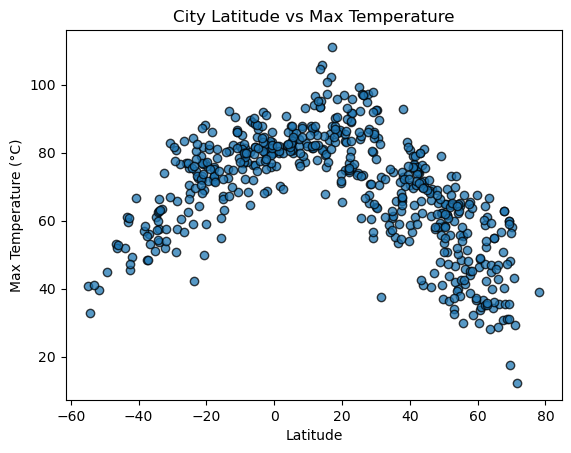

In [67]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],edgecolor="black",alpha=.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

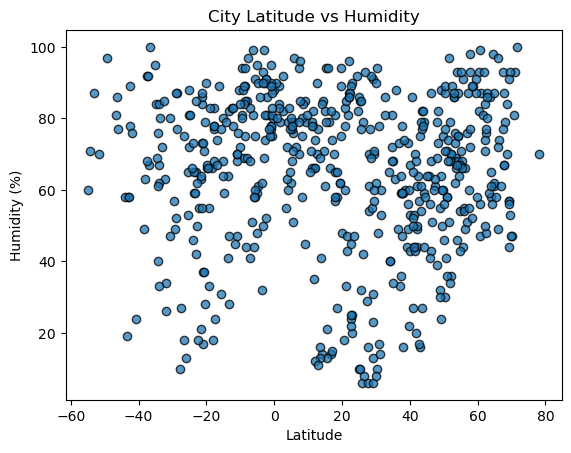

In [68]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],edgecolor="black",alpha=.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

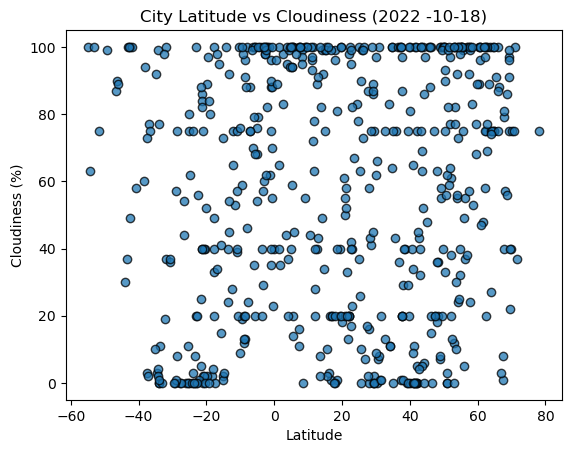

In [69]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],edgecolor="black",alpha=.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2022 -10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

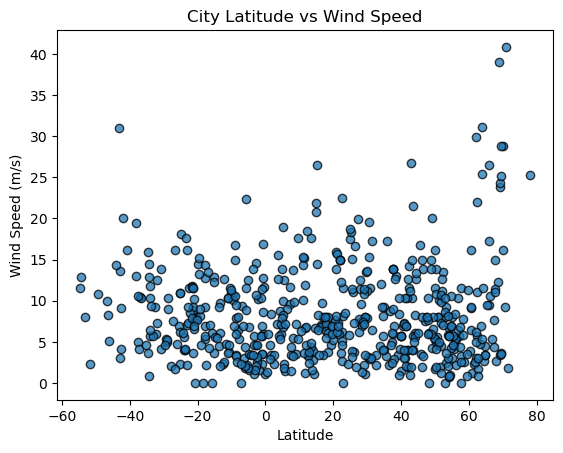

In [70]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],edgecolor="black",alpha=.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [71]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, title, save_as):
       (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [72]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,severobaykal'sk,55.6500,109.3167,29.77,91,99,4.16,RU,1684946751
4,lata,40.1629,-8.3327,70.41,53,81,5.66,PT,1684946752
6,lompoc,34.6391,-120.4579,60.85,81,100,5.75,US,1684946752
9,praya,14.9215,-23.5087,79.34,61,75,21.85,CV,1684946753
11,bethel,41.3712,-73.4140,76.35,53,0,6.91,US,1684946633


In [73]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,59.74,58,100,13.65,AU,1684946750
1,manokwari,-0.8667,134.0833,80.01,77,88,2.35,ID,1684946750
3,ushuaia,-54.8000,-68.3000,40.66,60,100,11.50,AR,1684946538
5,margaret river,-33.9500,115.0667,57.65,67,77,11.77,AU,1684946752
7,lorengau,-2.0226,147.2712,80.06,86,100,10.20,PG,1684946753


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.61


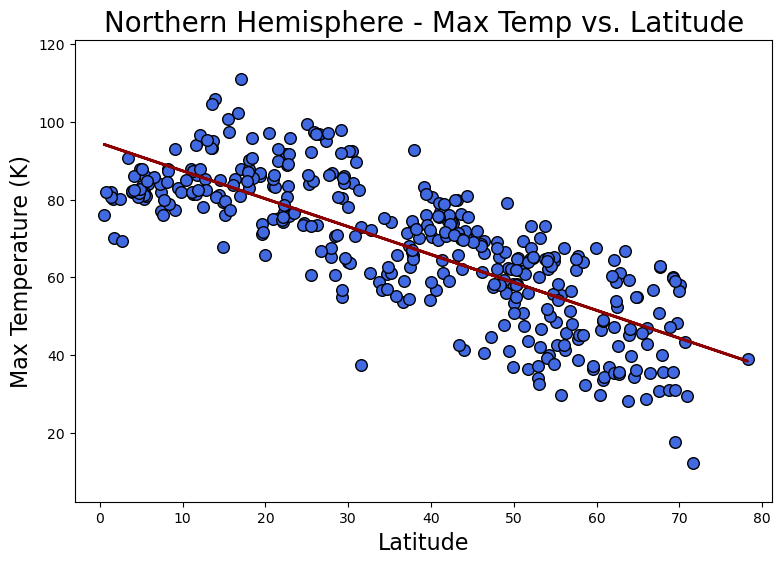

In [75]:
# Linear regression on Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (K)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')

plt.ylim(min(northern_hemi_df['Max Temp'])-10, max(northern_hemi_df['Max Temp'])+10)
plt.xlim(-3, max(northern_hemi_df['Lat'])+3)

print(f'The r-value is: {round(rvalue**2,2)}')

plt.savefig('output_data/City Latitude vs. MaxTemp_North.png')

plt.show()

The r-value is: 0.6


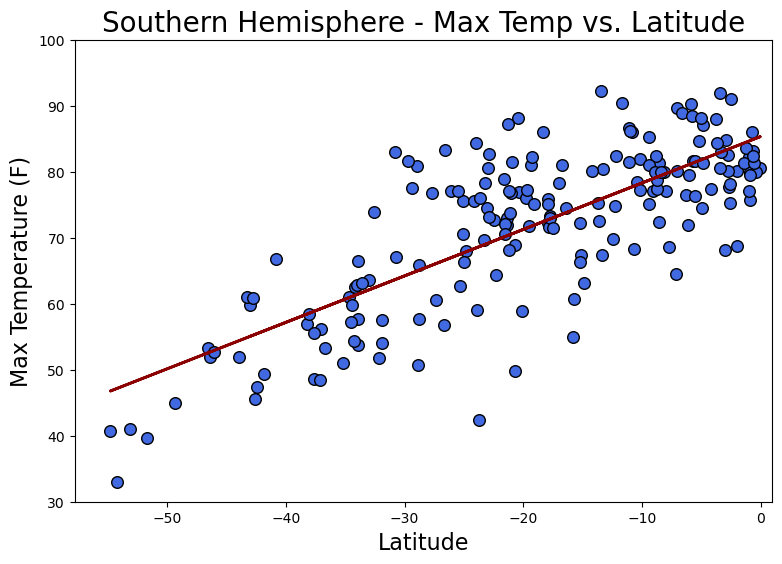

In [99]:
# Linear regression on Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')

plt.ylim(30, 100)
plt.xlim(min(southern_hemi_df['Lat'])-3, +1)


print(f'The r-value is: {round(rvalue**2,2)}')

plt.savefig('output_data/City Latitude vs. MaxTemp_South.png')

plt.show()

**Discussion about the linear relationship:** As expected the correlation bewteen Latitude and Maximum temperture for both the Southern and Northern Hemisphere is different. The correlation between the Latitude and the Northern Hemishphere is negative. Which means the farther north from the equator a city is the lower the maxiumum temperature becomes. Inversely the correlation between the souhtern hemisphere is positve and the clsoer you are or a city is to the equator the higher the maximum temperature becomes.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0


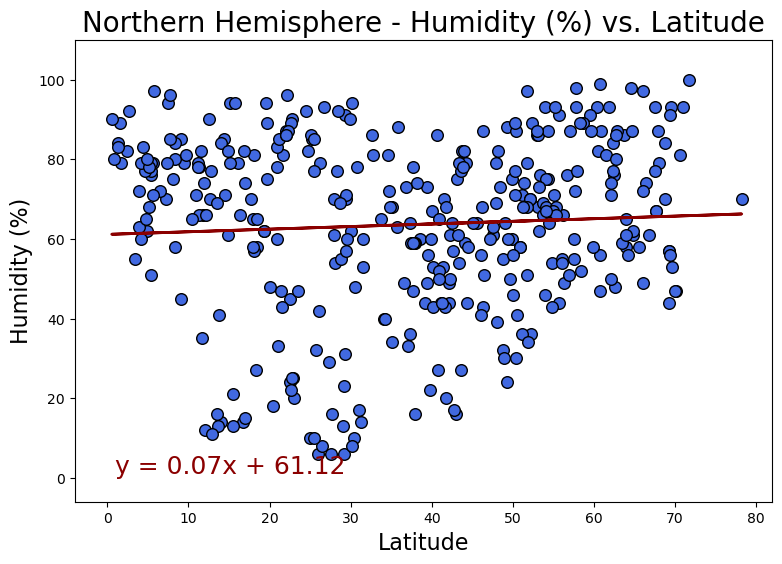

In [79]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

plt.title('Northern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')


plt.ylim(-6, 110)

plt.xlim(-4, 82)

print(f'The r-value is: {round(rvalue**2,2)}')

plt.savefig('output_data/City Latitude vs. Humidity_North.png')

plt.show()

The r-value is: 0.03


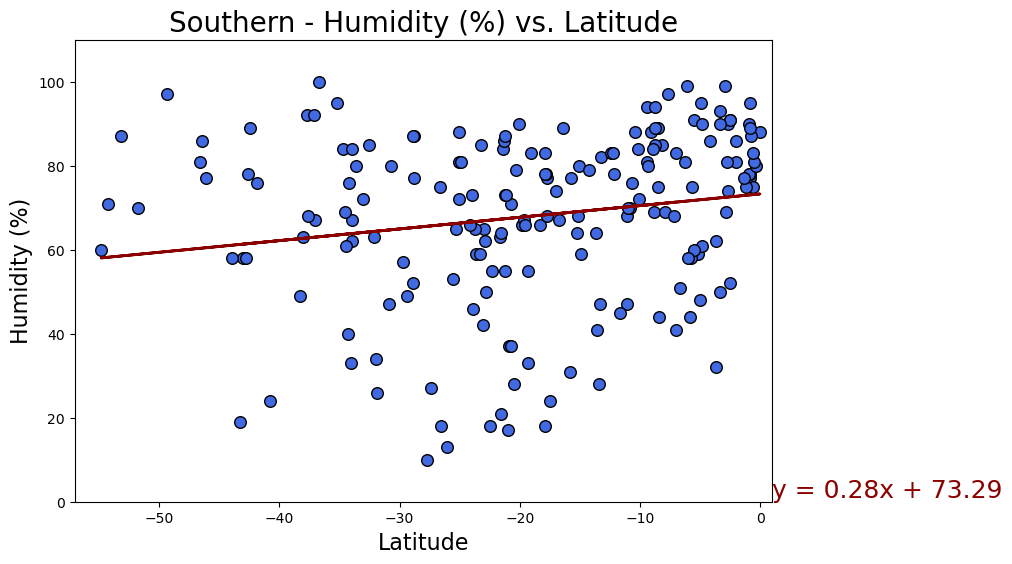

In [81]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

plt.title('Southern - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')


plt.ylim(0, 110)

plt.xlim(-57, 1)

print(f'The r-value is: {round(rvalue**2,2)}')

plt.savefig('output_data/City Latitude vs. Humidity_North.png')

plt.show()

**Discussion about the linear relationship:** There is very little correlation between the Humidity levels and the location of a city. The farther north from the equator the humidity levels do rise but not a significant amount. As for the southern hemisphere higher levels of humidity are observed closer to the equator but the further south the broader the range of humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0


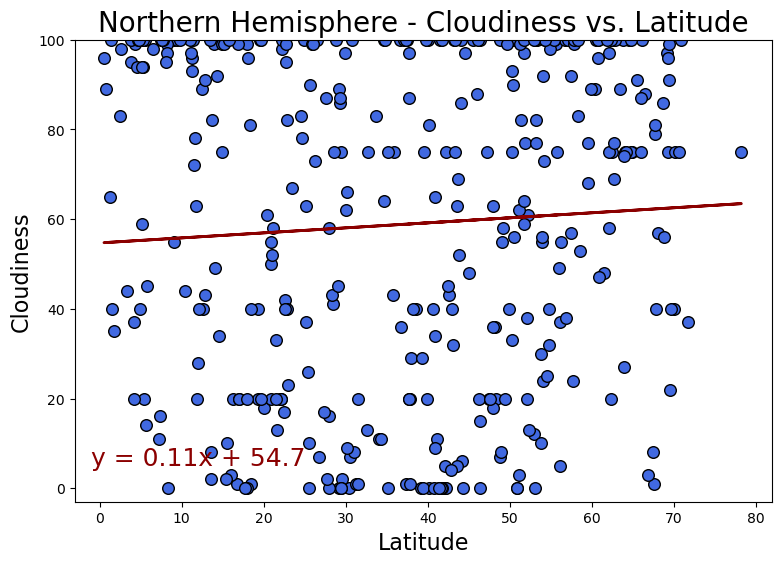

In [93]:
### Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

plt.title('Northern Hemisphere - Cloudiness vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(-1, 5), fontsize=18, color='darkred')


plt.ylim(-3, 100)

plt.xlim(-3, 82)

print(f'The r-value is: {round(rvalue**2,2)}')

plt.savefig('output_data/City Latitude vs. Cloudiness_North.png')

plt.show()

The r-value is: 0.02


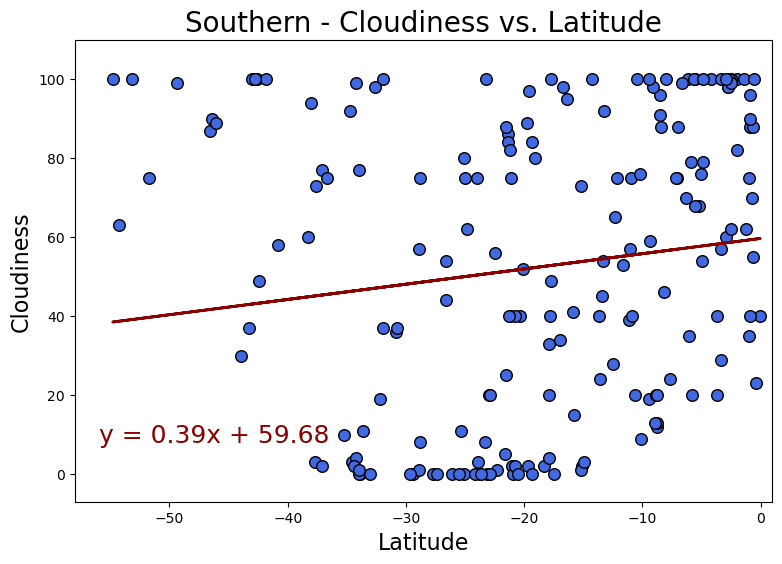

In [104]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

plt.title('Southern - Cloudiness vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(-56, 8), fontsize=18, color='darkred')


plt.ylim(-7, 110)

plt.xlim(-58, 1)

print(f'The r-value is: {round(rvalue**2,2)}')

plt.savefig('output_data/City Latitude vs. Cloudiness_South.png')

plt.show()

**Discussion about the linear relationship:** There is no correlation between Cloudiness and Latitude. Cloudiness levels are widely spread out across both the southern and northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01


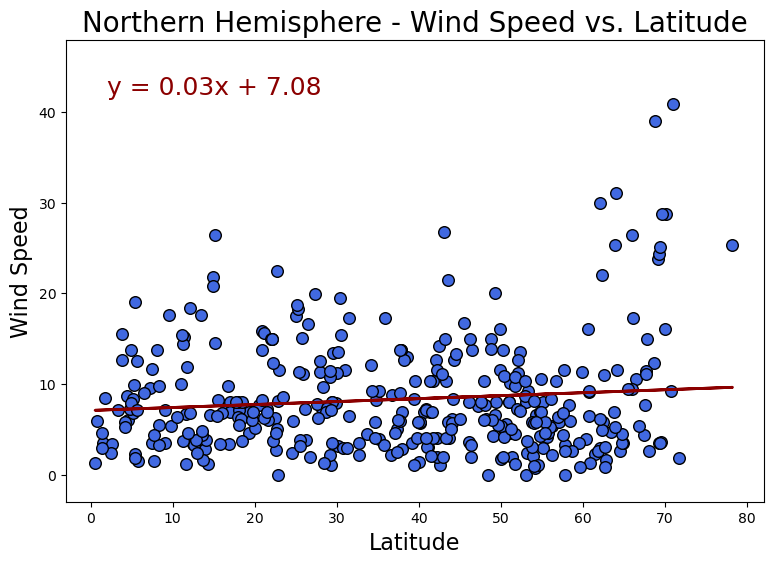

In [105]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

plt.title('Northern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(2, 42), fontsize=18, color='darkred')


plt.ylim(-3, 48)

plt.xlim(-3, 82)

print(f'The r-value is: {round(rvalue**2,2)}')

plt.savefig('output_data/City Latitude vs. WindSpeed_North.png')

plt.show()

The r-value is: 0.06


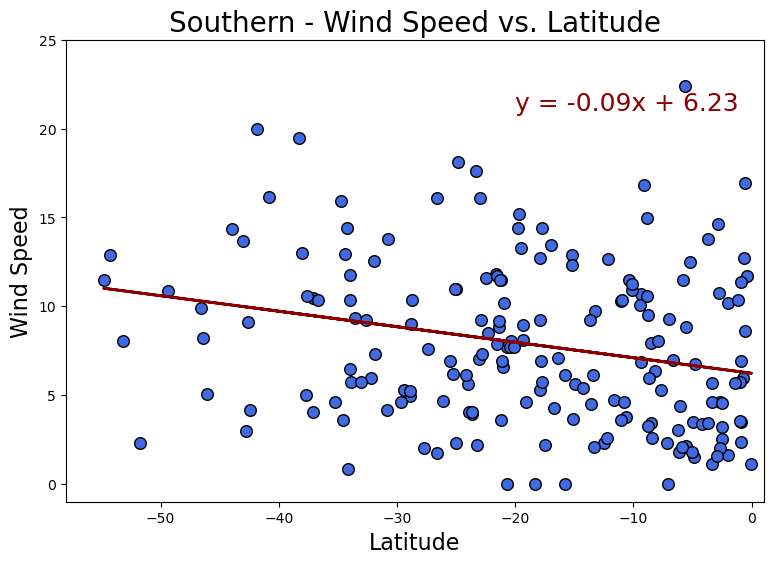

In [106]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

plt.title('Southern - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(-20, 21), fontsize=18, color='darkred')


plt.ylim(-1, 25)

plt.xlim(-58, 1)

print(f'The r-value is: {round(rvalue**2,2)}')

plt.savefig('output_data/City Latitude vs. WindSpeed_South.png')

plt.show()

**Discussion about the linear relationship:** There is very low correlation between wind speed and latitude in the northern hemisphere with a majority of the cities have a wind speed between 0-20 mph. There is also very low correlation between wind speed and latitude the wind speed slighty increases the farther south you move from the equator. 